# Load and extract Suicide Risk Lexicon

Lexicon validated by clincians with expertise in suicide research


In [18]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import sys
# TODO: !pip install construct-tracker

sys.path.append('./../construct-tracker/src/')
sys.path.append('./../construct-tracker/src/construct_tracker/')

from construct_tracker import lexicon
from importlib import reload
reload(lexicon)



In [3]:
srl = lexicon.load_lexicon(name = 'srl_v1-0')
srl_prototypes = lexicon.load_lexicon(name = 'srl_prototypes_v1-0')

In [4]:
# load reddit posts and count 

from construct_tracker import load_data

reddit_df = load_data(dataset = 'reddit_27', split='train')
reddit_df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,EDAnonymous,lillylourose,2018/11/28,"The reason why I stoped with eating? Well, for...",0.478964,2.747789,2.109524,95.205000,86.583333,4.761905,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
1,EDAnonymous,tinyTRONgirl,2019/10/15,I’m freaking out WHY can’t my body just digest...,5.559945,5.475852,6.247874,80.769913,67.394161,8.309854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.131764,0.000000,0.00000,0.0
2,EDAnonymous,Vetmyana,2019/07/02,Tw weight loss achievement Just lost 8lbs (wei...,2.546452,4.004821,3.520194,91.910290,75.451613,4.960000,...,0.0,0.254812,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,EDAnonymous,Fastingcametome,2019/07/25,When not eating is your solution to everything...,0.836122,2.859536,2.359891,95.598204,82.741497,5.824762,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.145753,0.00000,0.0
4,EDAnonymous,bananamo7,2019/04/19,How to dedicate a long weekend to beginning re...,5.119444,6.724697,6.719444,70.932500,69.185185,10.585185,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,unitedkingdom,Anomalous-Entity,2019/05/07,When someone is having a go at the U.S. and ma...,1.758324,4.527215,4.326374,77.275769,88.038462,6.048352,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.258879,0.000000,0.00000,0.0
28076,unitedkingdom,Squigglish,2019/03/28,My MP voted against every single Indicative Mo...,6.098205,9.032098,6.976923,52.759744,104.384615,7.887179,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28077,unitedkingdom,javaxcore,2019/09/02,What is Order 66? I have heard much talk of th...,0.761500,2.701924,1.290000,103.625000,82.500000,4.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28078,unitedkingdom,AlwaysGoForAusInRisk,2019/05/13,Seeing the GB Ambassador for Denmark today at ...,8.632452,8.773091,9.139258,61.853071,60.968504,12.296513,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [5]:
reddit_df.groupby('subreddit').count()['author']

subreddit
EDAnonymous          1040
ForeverAlone         1040
UKPersonalFinance    1040
addiction            1040
adhd                 1040
alcoholism           1040
anxiety              1040
autism               1040
bipolarreddit        1040
bpd                  1040
conspiracy           1040
depression           1040
divorce              1040
guns                 1040
healthanxiety        1040
legaladvice          1040
lonely               1040
mentalhealth         1040
mindfulness          1040
personalfinance      1040
ptsd                 1040
schizophrenia        1040
socialanxiety        1040
suicidewatch         1040
teaching             1040
ukpolitics           1040
unitedkingdom        1040
Name: author, dtype: int64

In [6]:
reddit_df_mini = reddit_df[reddit_df['subreddit'].isin(['anxiety','bpd','depression','suicidewatch'])]



In [7]:

toy = True # First try running on a subset of documents

if toy:
	# Sample a subset and obtain documents column
	reddit_df_mini = reddit_df_mini.sample(n=20, random_state=42)
	documents = reddit_df_mini['post'].values
	subreddits = reddit_df_mini['subreddit'].values
	print(len(documents))






20


### 1. Count tokens using lexicon

In [8]:
# Now count whether tokens appear in document:
# About 75 sec for 4160 reddits posts

load = False

save_dir = './data/feature_extraction/reddit_27/'

if load:
	counts = pd.read_csv(save_dir+'suicide_risk_lexicon_counts.csv')
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	with open(save_dir+'suicide_risk_lexicon_matches_construct2doc.json', 'r') as json_file:
		matches_construct2doc  = json.load(json_file)

	# Can do the same for matches_by_construct, matches_doc2construct

else:
	counts, matches_by_construct, matches_doc2construct, matches_construct2doc  = srl.extract(documents,
																						normalize = False,
																						save_dir = save_dir
																						)
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	display(counts)
	


extracting... 


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,0,Is it life really worth living? I finished col...,1,1,0,0,0,2,0,2,...,0,0,0,0,0,2,0,0,200,suicidewatch
1,1,I’m broken and unlovable I spent the first 17 ...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,142,suicidewatch
2,2,Anxiety about my brain My panic attacks come i...,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,1,73,anxiety
3,3,Scared of my own thoughts I was listening to m...,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,42,depression
4,4,I'm not going to kill myself today. Not today.,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,depression
5,5,Really scared to lose my FP. Am I overreacting...,0,0,0,0,0,0,0,3,...,0,0,0,1,0,1,0,0,400,bpd
6,6,Been through this a few times. The time is nea...,0,0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,108,suicidewatch
7,7,Trying to pull together Sometimes I feel like ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,75,suicidewatch
8,8,Couch vs Bed Is it just me or do other people ...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,68,depression
9,9,What are some things I can do to be supportive...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,86,depression


In [9]:
# Interpret counts: visualize matches in context  


n = 2
highlight_constructs = ['Lethal means for suicide', 'Passive suicidal ideation', 'Direct self-injury', 'Panic', 'Depressed mood']
for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	lexicon.highlight_matches(documents, construct,n, matches_construct2doc, random_seed=42)
	print()



Matches for Lethal means for suicide:



Matches for Passive suicidal ideation:



Matches for Direct self-injury:



Matches for Panic:



Matches for Depressed mood:


Text(0, 0.5, 'counts')

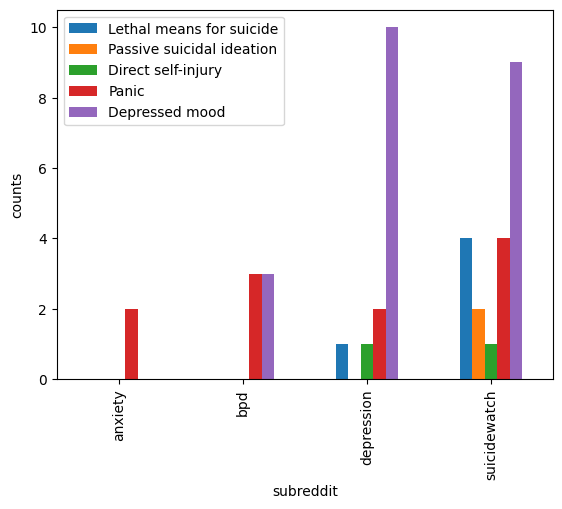

In [14]:
# Bar plot of counts split by subreddit
import matplotlib.pyplot as plt
counts[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel('counts')


### 2. Construct-Text Similarity (CTS)
Find similar tokens to the tokens in the lexicon

In [15]:
from construct_tracker import cts


<module 'construct_tracker.cts' from '/Users/danielmlow/Dropbox (MIT)/datum/lexicon/./../construct-tracker/src/construct_tracker/cts.py'>

We'll use the highest prototypes for CTS (3/3 by raters) `srl_prototypes` so that it doesn't find similarity with low prototypical tokens

In [13]:

# 31 sec for 42 reddit posts and 50 constructs. 
lexicon_dict = srl_prototypes.to_dict()
features, documents_tokenized, lexicon_dict_final_order, cosine_similarities = cts.measure(
    lexicon_dict,
    documents,
	# You can store and reload embeddings for lexicon tokens
	# stored_embeddings_path = './data/lexicons/suicide_risk_lexicon_v1-0/embeddings_srl-tokens_all-MiniLM-L6-v2.pickle',
	count_if_exact_match = 'sum',
	similarity_threshold = None, 
	
    )

display(features)


INFO: Default input sequence length for all-MiniLM-L6-v2: 256
INFO: Encoding 1523 new construct tokens...


Batches:   0%|          | 0/48 [00:00<?, ?it/s]

INFO: Finished encoding construct tokens.
INFO: Tokenizing documents...
INFO: Finished tokenization.
INFO: Encoding all document tokens...
INFO: computing similarity between 50 constructs and 20 documents...
20it [00:00, 23.58it/s]
INFO: Finished.


extracting... 


100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


,document_id,documents,documents_tokenized,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,3,Is it life really worth living? I finished col...,"[Is it life really worth living?, I finished c...",0.342068,0.363032,0.356042,0.342099,0.359464,0.361808,0.304708,...,0.357558,0.191411,0.423201,0.196732,0.229507,0.177132,0.283880,1.136634,0.386409,0.430727
1,6,I’m broken and unlovable I spent the first 17 ...,"[I ’m broken, unlovable, I spent the first 17 ...",0.465988,0.680776,0.680776,0.377227,0.338367,0.414275,0.173597,...,0.236894,0.210469,0.349397,0.305260,0.269526,0.251443,0.304289,0.347974,0.381636,0.281913
2,4,Anxiety about my brain My panic attacks come i...,[Anxiety about my brain My panic attacks come ...,0.493905,0.668989,0.520472,0.516625,0.507007,0.443123,0.137774,...,0.230586,0.285810,2.242476,0.235414,0.279124,0.242393,0.251336,0.279124,0.467615,1.208259
3,9,Scared of my own thoughts I was listening to m...,[Scared of my own thoughts I was listening to ...,0.347674,0.384690,0.279352,0.278162,0.409336,0.535517,0.340621,...,0.297117,0.304388,0.381759,0.252667,0.383834,0.385792,0.267281,0.264661,0.460263,0.454348
4,10,I'm not going to kill myself today. Not today.,"[I'm not going to kill myself today., Not today.]",0.293187,1.341518,0.266488,0.266488,0.236186,0.383790,0.253287,...,0.249334,0.244370,0.488096,0.262029,0.286278,0.321696,0.349836,0.350303,0.435144,0.337130
5,11,Really scared to lose my FP. Am I overreacting...,"[Really scared to lose my FP., Am I overreacti...",0.399596,0.354134,0.345777,0.345777,0.309872,0.345661,0.169186,...,4.213831,0.384920,0.324597,0.397207,0.272356,1.321589,0.329901,0.313254,0.403173,0.394934
6,8,Been through this a few times. The time is nea...,"[Been through this a few times., The time is n...",0.293561,0.196077,0.181616,0.171940,0.063814,0.201602,0.133601,...,0.209616,0.162772,0.192501,0.181873,0.282352,0.272277,0.248202,0.257586,0.313266,0.232274
7,7,Trying to pull together Sometimes I feel like ...,"[Trying to pull together, Sometimes I feel lik...",0.527037,0.411099,0.411099,0.400868,0.250736,0.426170,0.175309,...,0.354387,0.293729,0.312047,0.287790,0.310636,0.382455,0.372048,0.364346,0.378333,0.317450
8,2,Couch vs Bed Is it just me or do other people ...,"[Couch vs Bed Is it just me or? \n\n, do other...",0.319615,0.563512,0.244654,0.289401,0.236511,0.325880,0.330769,...,0.297471,0.256870,0.589457,0.272723,0.240220,0.311332,0.310004,0.299499,0.526168,0.459947
9,5,What are some things I can do to be supportive...,[What are some things I can do to be supportiv...,0.418472,0.286675,0.367676,0.275199,0.374292,0.460067,0.227693,...,0.632436,0.354898,0.340465,0.276662,0.411375,0.378128,0.439169,0.337952,0.500486,0.339172


In [21]:
# If below threshold then replace with NaN
threshold = 0.45 # depends on embeddings used

highlight_constructs_max = [n+'_max' for n in highlight_constructs]

features_threshold = features[highlight_constructs_max]
features_threshold[features_threshold <= threshold] = 0
features_threshold['subreddit'] = subreddits


/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_40969/4082478602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = 0
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_40969/4082478602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = 0
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_40969/4082478602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [22]:
features_threshold

,Lethal means for suicide_max,Passive suicidal ideation_max,Direct self-injury_max,Panic_max,Depressed mood_max,subreddit
0,0.000000,0.000000,0.000000,0.509904,0.000000,suicidewatch
1,0.680776,0.465988,0.000000,0.000000,1.597430,suicidewatch
2,0.520472,0.493905,0.516625,2.228563,0.000000,anxiety
3,0.000000,0.000000,0.000000,0.000000,0.637648,depression
4,0.000000,0.000000,0.000000,0.000000,0.000000,depression
5,0.000000,0.000000,0.000000,0.000000,0.000000,bpd
6,0.000000,0.000000,0.000000,0.000000,0.000000,suicidewatch
7,0.000000,0.527037,0.000000,0.000000,0.467695,suicidewatch
8,0.000000,0.000000,0.000000,0.610785,0.000000,depression
9,0.000000,0.000000,0.000000,0.486648,3.335488,depression


Text(0, 0.5, 'Sum of cosine similarities > 0.45')

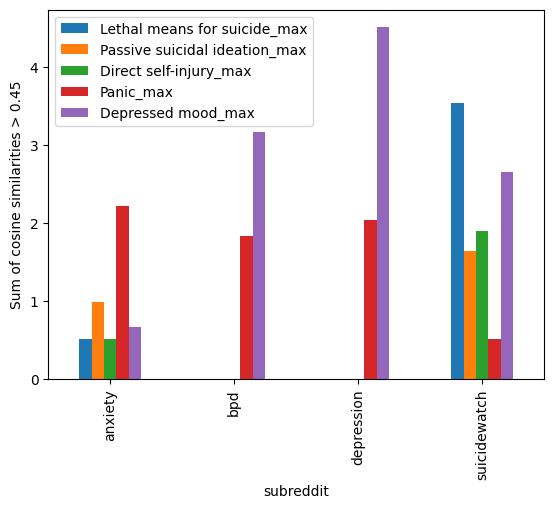

In [24]:
# Bar plot of counts split by subreddit
features_threshold[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')


In [26]:
features

,document_id,documents,documents_tokenized,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,3,Is it life really worth living? I finished col...,"[Is it life really worth living?, I finished c...",0.342068,0.363032,0.356042,0.342099,0.359464,0.361808,0.304708,...,0.357558,0.191411,0.423201,0.196732,0.229507,0.177132,0.283880,1.136634,0.386409,0.430727
1,6,I’m broken and unlovable I spent the first 17 ...,"[I ’m broken, unlovable, I spent the first 17 ...",0.465988,0.680776,0.680776,0.377227,0.338367,0.414275,0.173597,...,0.236894,0.210469,0.349397,0.305260,0.269526,0.251443,0.304289,0.347974,0.381636,0.281913
2,4,Anxiety about my brain My panic attacks come i...,[Anxiety about my brain My panic attacks come ...,0.493905,0.668989,0.520472,0.516625,0.507007,0.443123,0.137774,...,0.230586,0.285810,2.242476,0.235414,0.279124,0.242393,0.251336,0.279124,0.467615,1.208259
3,9,Scared of my own thoughts I was listening to m...,[Scared of my own thoughts I was listening to ...,0.347674,0.384690,0.279352,0.278162,0.409336,0.535517,0.340621,...,0.297117,0.304388,0.381759,0.252667,0.383834,0.385792,0.267281,0.264661,0.460263,0.454348
4,10,I'm not going to kill myself today. Not today.,"[I'm not going to kill myself today., Not today.]",0.293187,1.341518,0.266488,0.266488,0.236186,0.383790,0.253287,...,0.249334,0.244370,0.488096,0.262029,0.286278,0.321696,0.349836,0.350303,0.435144,0.337130
5,11,Really scared to lose my FP. Am I overreacting...,"[Really scared to lose my FP., Am I overreacti...",0.399596,0.354134,0.345777,0.345777,0.309872,0.345661,0.169186,...,4.213831,0.384920,0.324597,0.397207,0.272356,1.321589,0.329901,0.313254,0.403173,0.394934
6,8,Been through this a few times. The time is nea...,"[Been through this a few times., The time is n...",0.293561,0.196077,0.181616,0.171940,0.063814,0.201602,0.133601,...,0.209616,0.162772,0.192501,0.181873,0.282352,0.272277,0.248202,0.257586,0.313266,0.232274
7,7,Trying to pull together Sometimes I feel like ...,"[Trying to pull together, Sometimes I feel lik...",0.527037,0.411099,0.411099,0.400868,0.250736,0.426170,0.175309,...,0.354387,0.293729,0.312047,0.287790,0.310636,0.382455,0.372048,0.364346,0.378333,0.317450
8,2,Couch vs Bed Is it just me or do other people ...,"[Couch vs Bed Is it just me or? \n\n, do other...",0.319615,0.563512,0.244654,0.289401,0.236511,0.325880,0.330769,...,0.297471,0.256870,0.589457,0.272723,0.240220,0.311332,0.310004,0.299499,0.526168,0.459947
9,5,What are some things I can do to be supportive...,[What are some things I can do to be supportiv...,0.418472,0.286675,0.367676,0.275199,0.374292,0.460067,0.227693,...,0.632436,0.354898,0.340465,0.276662,0.411375,0.378128,0.439169,0.337952,0.500486,0.339172


In [36]:
counts

,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,0,Is it life really worth living? I finished col...,1,1,0,0,0,2,0,2,...,0,0,0,0,0,2,0,0,200,suicidewatch
1,1,I’m broken and unlovable I spent the first 17 ...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,142,suicidewatch
2,2,Anxiety about my brain My panic attacks come i...,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,1,73,anxiety
3,3,Scared of my own thoughts I was listening to m...,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,42,depression
4,4,I'm not going to kill myself today. Not today.,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,depression
5,5,Really scared to lose my FP. Am I overreacting...,0,0,0,0,0,0,0,3,...,0,0,0,1,0,1,0,0,400,bpd
6,6,Been through this a few times. The time is nea...,0,0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,108,suicidewatch
7,7,Trying to pull together Sometimes I feel like ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,75,suicidewatch
8,8,Couch vs Bed Is it just me or do other people ...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,68,depression
9,9,What are some things I can do to be supportive...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,86,depression


,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anxiety
3,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bpd
6,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression


In [40]:
result

,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anxiety
3,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bpd
6,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suicidewatch
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,depression


In [42]:
highlight_constructs

['Lethal means for suicide',
 'Passive suicidal ideation',
 'Direct self-injury',
 'Panic',
 'Depressed mood']

Text(0, 0.5, 'Sum of cosine similarities')

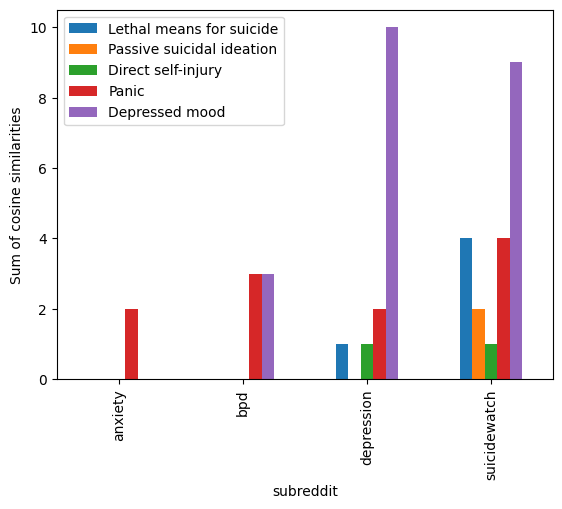

In [43]:
# Creating the new dataframe based on the conditions
result = counts[highlight_constructs].where(counts[highlight_constructs] >= 1, features_threshold)
result['subreddit']=subreddits


# Bar plot of counts split by subreddit
result[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities')


/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_40969/1661374701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_40969/1661374701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan


Text(0, 0.5, 'Sum of cosine similarities > 0.45')

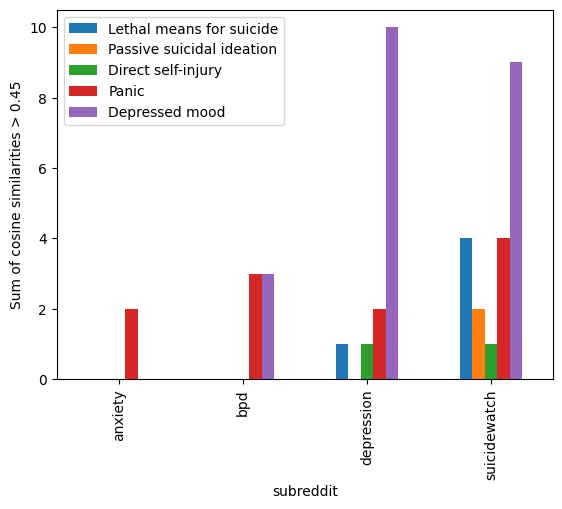

In [45]:
# If below threshold then replace with NaN
threshold = 0.45 # depends on embeddings used

features_threshold = result[highlight_constructs]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

features_threshold[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')

/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Text(0, 0.5, 'Sum of cosine similarities > 0.7')

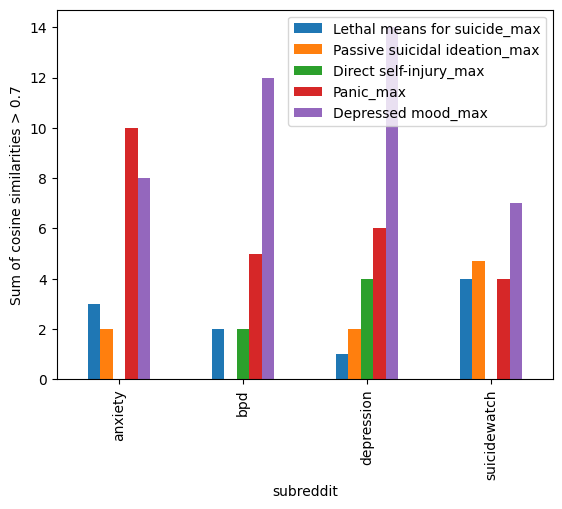

In [ ]:
# If below threshold then replace with NaN
threshold = 0.70 # depends on embeddings used
features_threshold = result[highlight_constructs_max]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

features_threshold[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')

In [47]:
# TODO: tokenization messing up space, which doesnt allow highlithing matches in context
# TODO: highlight exact match if possible: replace values in cosine_similarities
# Interpret scores
doc_id = 7

# Interpret counts: visualize matches in context  

highlight_constructs = ['Lethal means for suicide', 'Passive suicidal ideation', 'Direct self-injury', 'Panic', 'Depressed mood']
for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	
	most_similar_lexicon_token, most_similar_document_token, highest_similarity = cts.get_highest_similarity_phrase(doc_id, construct, documents, documents_tokenized, cosine_similarities, lexicon_dict_final_order)
	print()



Matches for Lethal means for suicide:
The construct 'Lethal means for suicide' through its token 'hanging myself' had the highest cosine similarity (0.41) with the following document token:
'Trying to pull together'



Matches for Passive suicidal ideation:
The construct 'Passive suicidal ideation' through its token 'wish I would not wake up' had the highest cosine similarity (0.53) with the following document token:
'but I ca n’t shake the feeling that no one would notice if I just did n’t wake up.'



Matches for Direct self-injury:
The construct 'Direct self-injury' through its token 'burn myself' had the highest cosine similarity (0.4) with the following document token:
'Ca n’t bring myself to tell anyone I still feel this way'



Matches for Panic:
The construct 'Panic' through its token 'panic' had the highest cosine similarity (0.32) with the following document token:
'cared'



Matches for Depressed mood:
The construct 'Depressed mood' through its token 'I feel sad all the time' had the highest cosine similarity (0.47) with the following document token:
'Sometimes I feel like I do n’t exist.'
